# Informe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")

In [51]:
def get_postulaciones():
    postulaciones = pd.read_csv('data/fiuba_4_postulaciones.csv')
    columns_rename = {'idaviso': 'id_aviso', 'idpostulante': 'id_postulante', 'fechapostulacion': 'fecha_postulacion'}
    postulaciones = postulaciones.rename(columns=columns_rename)
    postulaciones['fecha_postulacion']=pd.to_datetime(postulaciones['fecha_postulacion'])
    return postulaciones

def get_avisos_detalle():
    avisos_detalle = pd.read_csv('data/fiuba_6_avisos_detalle.csv')
    columns_rename = {'idpostulante': 'id_postulante', 'idaviso': 'id_aviso'}
    avisos_detalle = avisos_detalle.rename(columns=columns_rename)
    return avisos_detalle

def get_year_of_birth(postulantes_genero_edad):
    return (pd.to_datetime
            (postulantes_genero_edad['fechanacimiento'], errors='coerce', format='%Y-%m-%d')
            .dt.year)

def get_age(yearOfBirth):
    return 2018 - yearOfBirth
    
def get_age_range(yearOfBirth):
    age = get_age(yearOfBirth)
    if(age<25): return 'Entre 18 y 24'
    if(age<30): return 'Entre 25 y 30'
    if(age<35): return 'Entre 30 y 35'
    if(age<40): return 'Entre 35 y 40'
    if(age<45): return 'Entre 40 y 45'
    if(age<50): return 'Entre 45 y 50'
    return 'Mayor de 50'

def get_postulantes_genero_edad():
    postulantes_genero_edad = pd.read_csv('data/fiuba_2_postulantes_genero_y_edad.csv')
    postulantes_genero_edad['año_nacimiento_postulante']=get_year_of_birth(postulantes_genero_edad)
    postulantes_genero_edad['edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age, na_action=None)
    postulantes_genero_edad['rango_edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age_range, na_action=None)
    columns_rename = {'idpostulante': 'id_postulante', 'fechanacimiento': 'fecha_nacimiento_postulante', 'sexo': 'genero_postulante'}
    postulantes_genero_edad = postulantes_genero_edad.rename(columns=columns_rename)
    postulantes_genero_edad = postulantes_genero_edad[['id_postulante', 'genero_postulante', 'fecha_nacimiento_postulante', 'edad_postulante', 'rango_edad_postulante']]
    postulantes_genero_edad['genero_postulante'] = postulantes_genero_edad['genero_postulante'].map({'FEM': 'Femenino', 'MASC': 'Masculino', 'NO_DECLARA': 'No declara'})
    return postulantes_genero_edad

def get_detalle_postulaciones():
    postulaciones = get_postulaciones()
    avisos = get_avisos_detalle()
    postulantes = get_postulantes_genero_edad()
    detalle_postulaciones = pd.merge(postulantes, postulaciones, on='id_postulante', how='inner') 
    detalle_postulaciones = pd.merge(detalle_postulaciones, avisos, on='id_aviso', how='inner')
    return detalle_postulaciones


Analisis de postulacioens por genero

In [52]:
postulaciones = get_detalle_postulaciones()
postulaciones.head(2)

,id_postulante,genero_postulante,fecha_nacimiento_postulante,edad_postulante,rango_edad_postulante,id_aviso,fecha_postulacion,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,NM5M,Femenino,1970-12-03,48.0,Entre 45 y 50,1112257047,2018-01-15 16:22:34,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
1,8krKL,Masculino,1972-11-06,46.0,Entre 45 y 50,1112257047,2018-01-21 09:45:13,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA


In [53]:
postulaciones['genero_postulante'].value_counts()

Femenino      1535476
Masculino     1499248
No declara      39482
Name: genero_postulante, dtype: int64

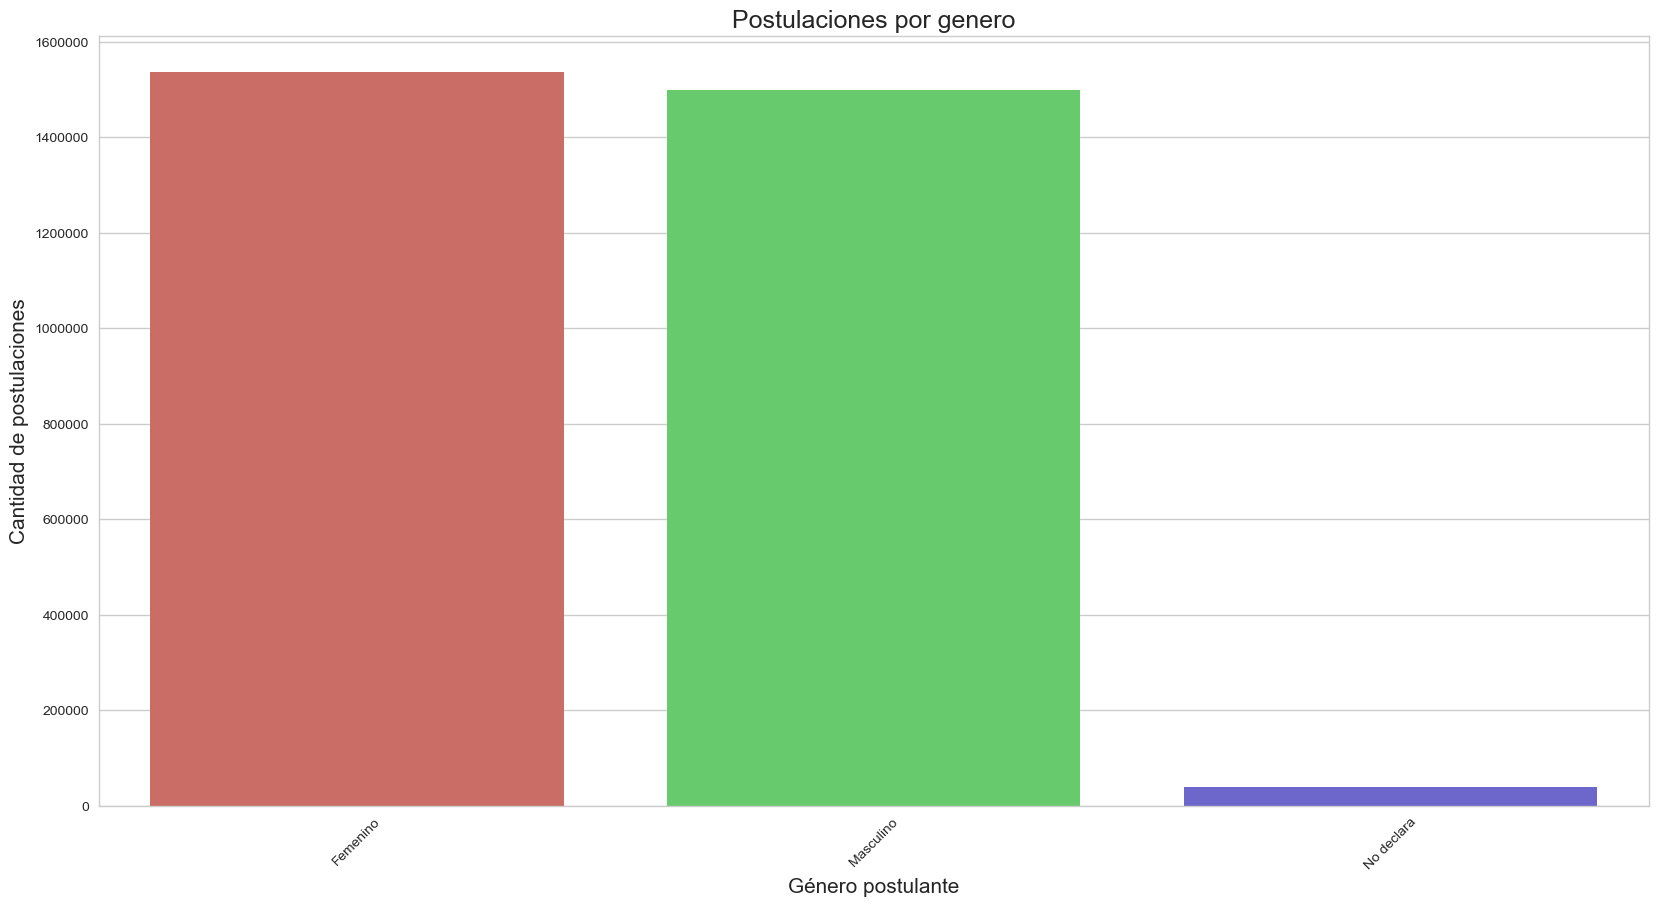

In [63]:
g = sns.countplot(x='genero_postulante', data=postulaciones, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género postulante", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Postulaciones por genero", fontsize=18)

In [60]:
top_10_areas=postulaciones['nombre_area'].value_counts().head(10).index
top_10_postulaciones = postulaciones[postulaciones['nombre_area'].isin(top_10_areas)]

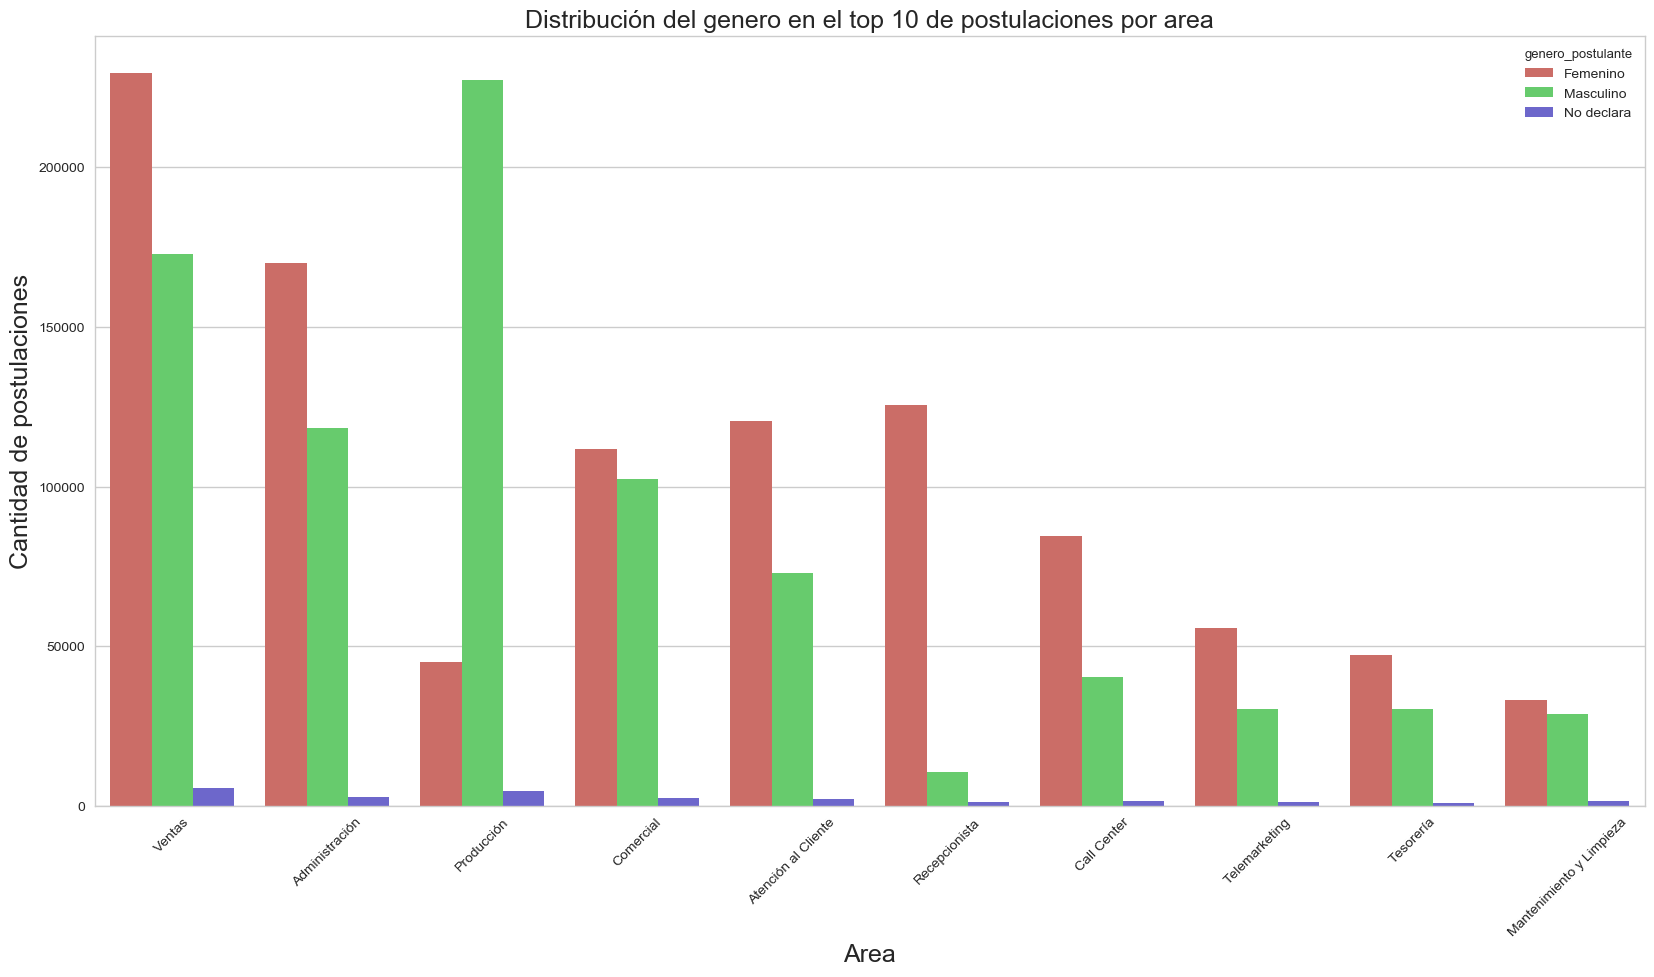

In [62]:
g = sns.countplot(x="nombre_area", hue="genero_postulante", data=postulaciones, order=top_10_areas, palette="hls")
g.set_title("Distribución del genero en el top 10 de postulaciones por area", fontsize=18)
g.set_xlabel("Area", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)

In [71]:
postulaciones['titulo'].value_counts().head(20)

Cajero/a - Part Time                                                      19031
Cajero/a-Repositor/a (Capital Federal)                                    16729
Recepcionista Administrativa                                              10998
Asesor/a de Belleza - Part Time                                            9605
Vendedores/as                                                              9434
Representante de Atencion al Cliente/ Banco                                8763
Asesores de Atención al Público - Part time                                8304
Cajera/o (Capital Federal / Zona Norte)                                    8025
Vendedor telefónico PART-TIME TURNO TARDE Call Center Microcentro          8005
Recepcionista                                                              7981
Vendedor de local de indumentaria infantil (Para trabajar en Shopping)     7698
Representante de Atención al Cliente  - Call Center                        7637
OPERADORES TELEFÓNICOS DE ATENCIÓN AL CL

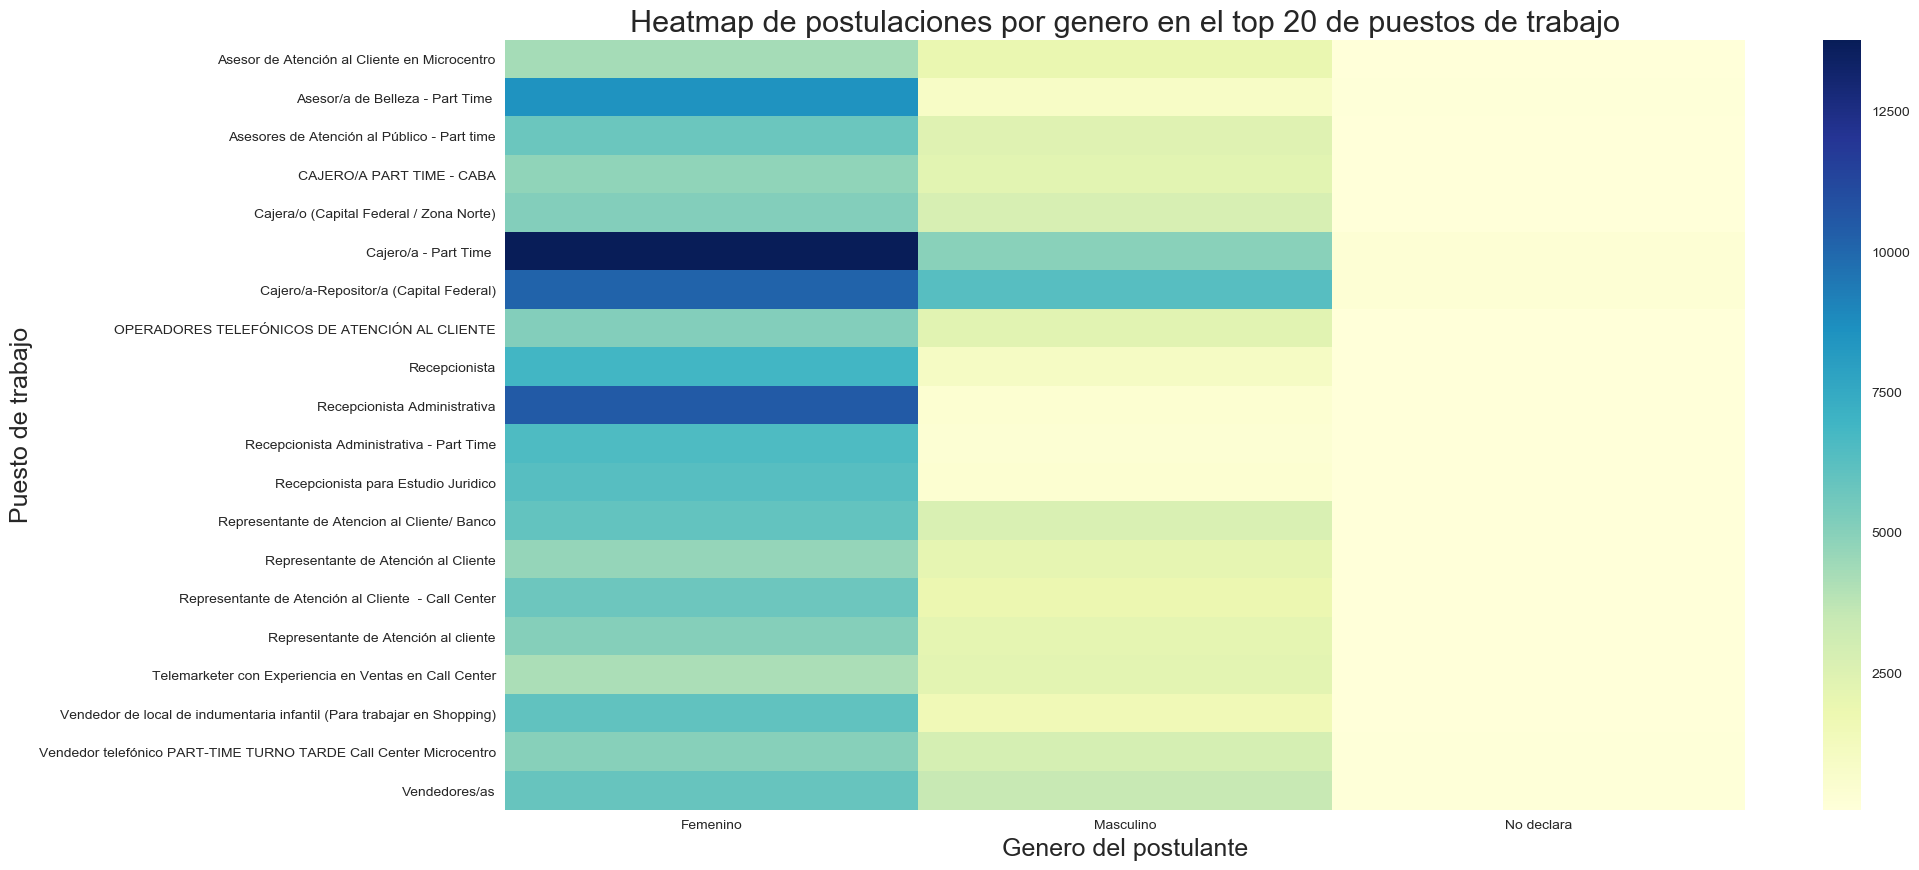

In [73]:
top_20_puestos=postulaciones['titulo'].value_counts().head(20).index
top_20_postulaciones_puestos = postulaciones[postulaciones['titulo'].isin(top_20_puestos)]
for_heatmap = top_20_postulaciones_puestos.pivot_table(index='titulo', columns='genero_postulante', values='id_aviso', aggfunc='count')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de postulaciones por genero en el top 20 de puestos de trabajo", fontsize=22)
g.set_xlabel("Genero del postulante",fontsize=18)
g.set_ylabel("Puesto de trabajo", fontsize=18)

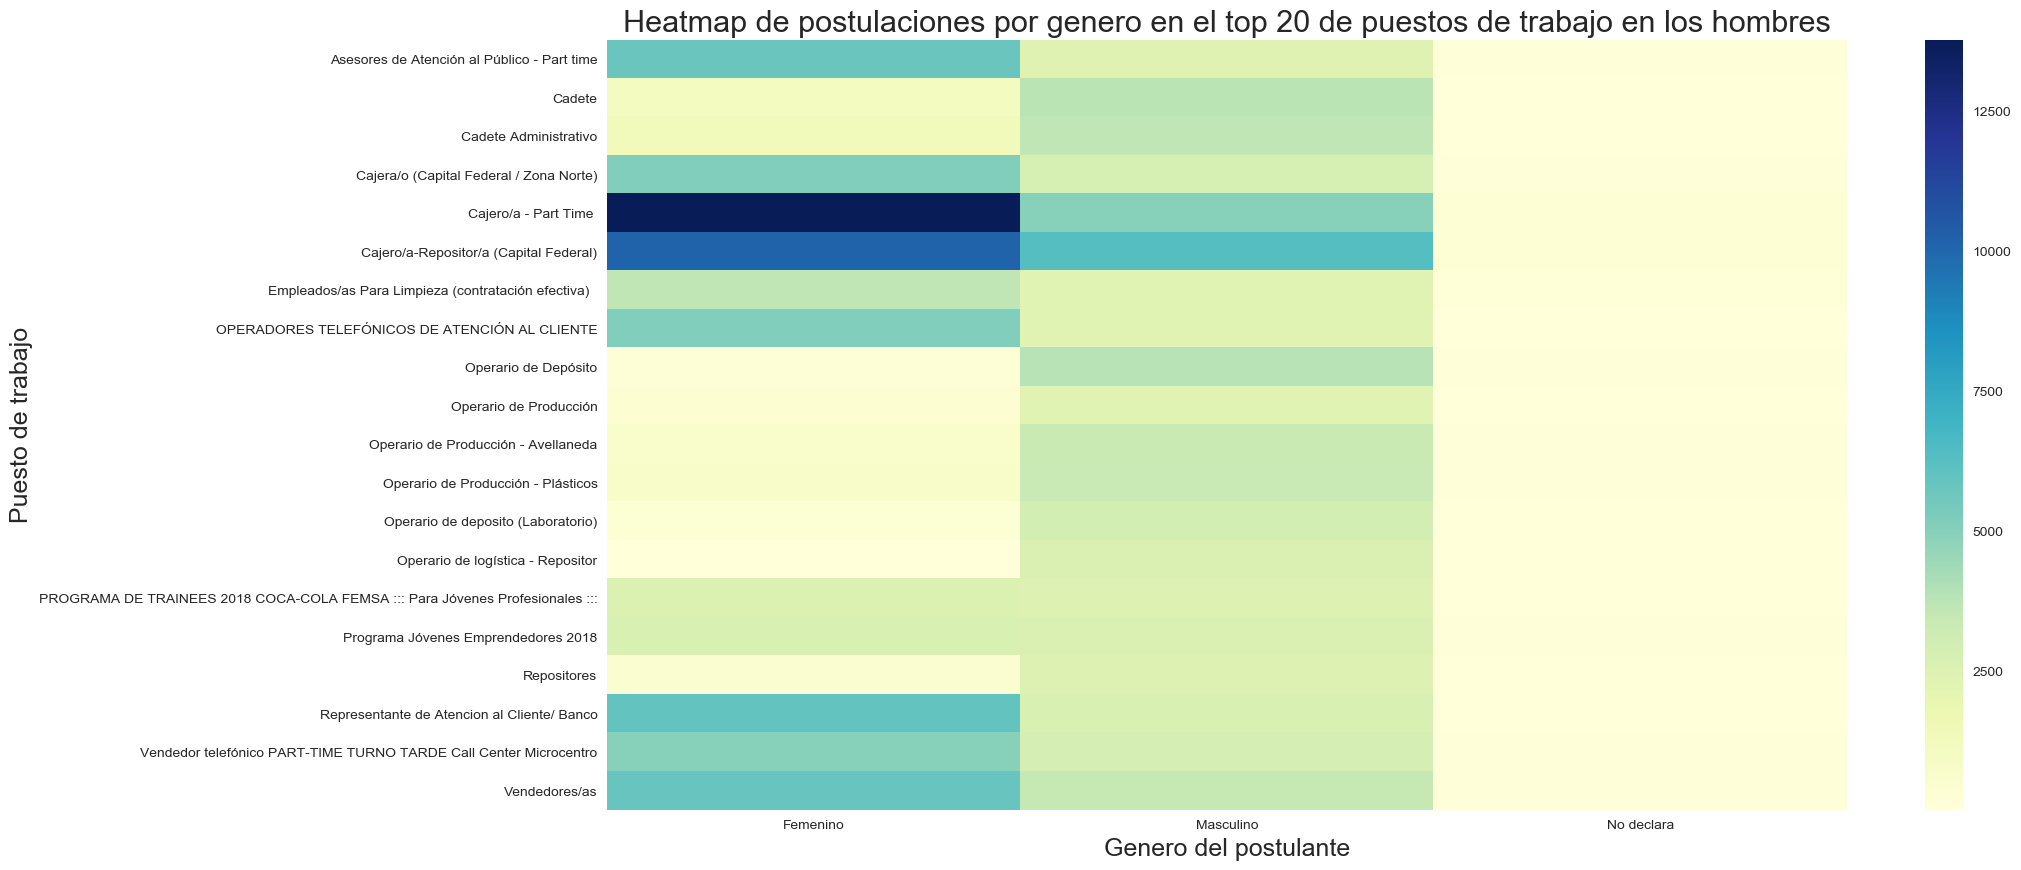

In [74]:
top_20_puestos_hombres=postulaciones[postulaciones['genero_postulante']=='Masculino']['titulo'].value_counts().head(20).index
top_20_postulaciones_puestos = postulaciones[postulaciones['titulo'].isin(top_20_puestos_hombres)]
for_heatmap = top_20_postulaciones_puestos.pivot_table(index='titulo', columns='genero_postulante', values='id_aviso', aggfunc='count')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de postulaciones por genero en el top 20 de puestos de trabajo en los hombres", fontsize=22)
g.set_xlabel("Genero del postulante",fontsize=18)
g.set_ylabel("Puesto de trabajo", fontsize=18)